In [2]:
using Luxor
using PythonCall
using Colors
using OpenStreetMapXPlot
using Plots
include("analyse.jl")
include("prepare_data.jl")

    CondaPkg Found dependencies: /home/adamkas/.julia/packages/PythonCall/wXfah/CondaPkg.toml
    CondaPkg Found dependencies: /home/adamkas/.julia/environments/v1.9/CondaPkg.toml
    CondaPkg Dependencies already up to date


extract_points2_LLA (generic function with 1 method)

In [3]:
flm = pyimport("folium")

Python: <module 'folium' from '/home/adamkas/.local/lib/python3.12/site-packages/folium/__init__.py'>

In [4]:
download_city_with_bounds("Kraków","8")

"The file is already downloaded"

In [5]:
krakow_df = get_POI("Kraków.csv",nothing,"Kraków.csv")

Row,elemtype,elemid,nodeid,lat,lon,key,value,group,influence,range
,String15,Int64,Int64,Float64,Float64,String31,String,String15,Float64,Float64
1,node,26860287,26860287,50.0155,19.9245,tourism,camp_site,leisure,5.0,1500.0
2,node,29783000,29783000,50.0849,20.0204,public_transport,stop_position,transport,5.0,300.0
3,node,30371892,30371892,50.0364,19.8253,public_transport,stop_position,transport,5.0,300.0
4,node,30372002,30372002,50.0488,19.9016,public_transport,stop_position,transport,5.0,300.0
5,node,32063299,32063299,50.0952,19.989,public_transport,stop_position,transport,5.0,300.0
6,node,34806198,34806198,50.072,20.1054,public_transport,stop_position,transport,5.0,300.0
7,node,41943557,41943557,50.0836,19.8598,public_transport,station,transport,5.0,300.0
8,node,41943557,41943557,50.0836,19.8598,railway,station,transport,10.0,700.0
9,node,48522023,48522023,50.1075,19.9955,public_transport,station,transport,5.0,300.0


In [6]:
#krakow_map = get_map_data("Kraków.osm")

In [7]:
krakow_boundaries = extract_points2_LLA("Kraków_boundaries.osm")
#using CSV
#CSV.write("boundries.csv",krakow_boundaries)
krakow_boundaries

Row,adminname,wayid,nodes,x,y
,String,Int64,Int64,Float64,Float64
1,Kraków,84775140,9971397601,20.0834,50.1098
2,Kraków,84775140,529412932,20.0834,50.1098
3,Kraków,84775140,2145500712,20.0835,50.1098
4,Kraków,84775140,2145500713,20.0835,50.1098
5,Kraków,84775140,1713030364,20.0837,50.1098
6,Kraków,84775140,2145500714,20.0839,50.11
7,Kraków,84775140,2145500716,20.0841,50.1101
8,Kraków,84775140,535415392,20.0842,50.1102
9,Kraków,84775140,535415409,20.0842,50.1104


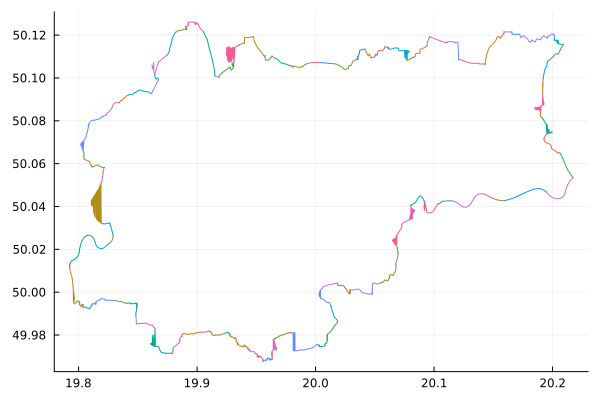

In [8]:
#using Plots
Plots.plot(krakow_boundaries.x,krakow_boundaries.y,
        group=krakow_boundaries.wayid,seriestype=:line,
        legend=false, markerbordercolor=nothing, 
        markersize=2, markerstrokewidth=0)

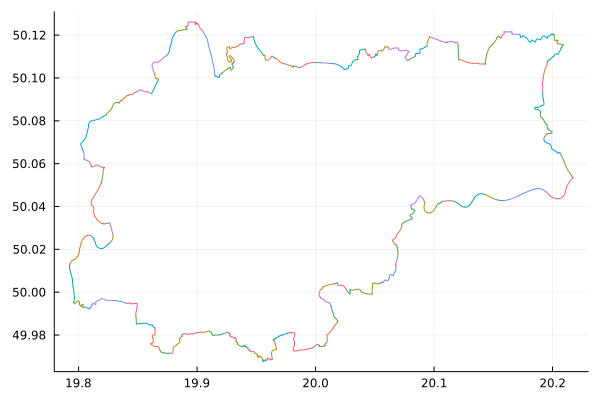

In [9]:
p = Plots.plot()
grouped_df = groupby(krakow_boundaries, :wayid)
for way in grouped_df
    plot!(p,way.x, way.y,label=false)
end
display(p)

In [12]:
ix_krakow = AttractivenessSpatIndex(krakow_df)
center_cracow = LLA(50.061692315544654, 19.939496620660737)
points_cracow = generate_sectors(6,500,center_cracow,100,
                        krakow_boundaries.y,krakow_boundaries.x)

6×100 Matrix{LLA}:
 LLA(50.062, 19.9465, 0.0195598)   …  LLA(50.0617, 19.9465, 0.0195596)
 LLA(50.0623, 19.9534, 0.0782392)     LLA(50.0617, 19.9535, 0.0782384)
 LLA(50.0625, 19.9604, 0.176038)      LLA(50.0617, 19.9604, 0.176036)
 LLA(50.0628, 19.9674, 0.312957)      LLA(50.0617, 19.9674, 0.312954)
 LLA(50.0631, 19.9743, 0.488995)      LLA(50.0617, 19.9744, 0.48899)
 LLA(50.0634, 19.9813, 0.704153)   …  LLA(50.0617, 19.9814, 0.704145)

In [13]:
map_plot = flm.Map(location = [50.061692315544654, 19.939496620660737],
                    zoom_start = 14, control_scale=true)

for sector in 1:size(points_cracow)[1]
    for point in 1:size(points_cracow)[2]
        lt = points_cracow[sector,point].lat
        ln = points_cracow[sector,point].lon
        flm.Marker([lt,ln],popup=1).add_to(map_plot)
    end
end
#for point in krakow_boundaries[1:500]
#    lt = point[1]
#    ln = point[2]
#    flm.Marker([lt,ln],popup=1).add_to(map_plot)
#end
map_plot

Python: <folium.folium.Map object at 0x7f2396409760>